### **OTT Platform Camparo and Shows Recommendation**

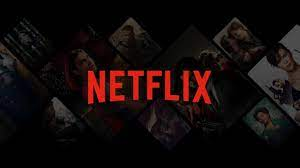    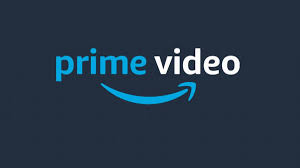    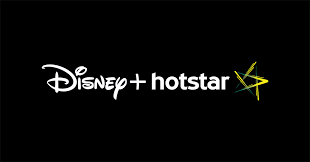

### **Log In**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sqlite3
import os
import math
import random
import smtplib


c = sqlite3.connect('/content/drive/MyDrive/OTT PROJECT/OTT.db')
cursor =c.cursor()
# cursor.execute("""Create Table OTT_login(
#    Name text,
#    Mail text,
#    Password text
  
#  )""")
email = ""
user= input("Already have an account? Y/N ")
if(user=='Y'):
  while(True):
    email=input("Enter your E-mail: ")
    password= input("Enter your password: ")
    cursor.execute("select * from OTT_login ")
    var = cursor.fetchall()
    topull = (email,password)
    flag= 0
    for tuple in var:
      if(email == tuple[1] and password == tuple[2]):
        flag=1
        break
    if(flag==1):
      print("Successful login")
      break
    else: 
      continue 



else:
  while(True):
    name= input("Enter your Full Name: ")
    email = input("Enter your Email: ")
    password = input('Enter Password: ')
    confirm = input('Confirm Password: ')
 
    if("@" not in email):  
      print('email error') 
      continue  
    
    if(password != confirm and len(password)<6):
      print('password error')
      continue
    

      
    digits="0123456789"
    OTP=""
    for i in range(6):
        OTP+=digits[math.floor(random.random()*10)]
    otp = OTP + " is your OTP"
    msg= otp

    s = smtplib.SMTP('smtp.gmail.com', 587)
    s.starttls()
    s.login("ottcomparo@gmail.com", "oxmpttooawznxaui")
    s.sendmail('ottcomparo@gmail.com',email,msg)
    a = input("Enter Your OTP >>: ")
    if a == OTP:
        print("Verified")
    else:
        print("Please Check your OTP again")
        continue
    cursor.execute('Insert into OTT_login values(?,?,?)',(name,email,password))
    c.commit()
    c.close(
        
    )
    break



Already have an account? Y/N N
Enter your Full Name: Harshitha 
Enter your Email: harshithasuresh.1902@gmail.com
Enter Password: 1234567
Confirm Password: 1234567
Enter Your OTP >>: 457933
Verified


# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px # for data visualization
%matplotlib inline


In [ ]:
amazon = pd.read_csv("/content/drive/MyDrive/OTT PROJECT/amazon_prime_titles.csv")
netflix = pd.read_csv("/content/drive/MyDrive/OTT PROJECT/netflix_titles.csv")
disney = pd.read_csv("/content/drive/MyDrive/OTT PROJECT/disney_plus_shows.csv")

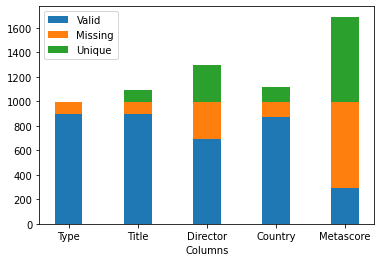

In [ ]:
x = ["Type","Title","Director","Country","Metascore"]

total = [disney['type'].notnull().sum(), disney['title'].notnull().sum(), disney['director'].notnull().sum(), disney['country'].notnull().sum(), disney['metascore'].notnull().sum()]
missing = [disney['type'].isnull().sum(), disney['title'].isnull().sum(), disney['director'].isnull().sum(), disney['country'].isnull().sum(), disney['metascore'].isnull().sum()]
unique = [disney['type'].nunique(), disney['title'].isnull().sum(), disney['director'].isnull().sum(), disney['country'].isnull().sum(), disney['metascore'].isnull().sum()]

b_unique = list(np.add(total,missing))

plt.bar(x,total,0.4,label='Valid')
plt.bar(x,missing,0.4,bottom = total,label='Missing')
plt.bar(x,unique,0.4,bottom = b_unique ,label='Unique')

plt.xlabel("Columns")
plt.legend()
plt.show()

# **DATA CLEANING**

In [ ]:
amazon = amazon.fillna(method ='bfill')
netflix = netflix.fillna(method='bfill')
disney = disney.fillna(method ='bfill')

In [ ]:
amazon.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


### **DISNEY DATASET**

In [ ]:
disney.head()

,imdb_id,title,plot,type,rated,year,released_at,added_at,runtime,genre,director,writer,actors,language,country,awards,metascore,imdb_rating,imdb_votes
0,tt0147800,10 Things I Hate About You,"A pretty, popular teenager can't go out on a d...",movie,PG-13,1999,31 Mar 1999,"November 12, 2019",97 min,"Comedy, Drama, Romance",Gil Junger,"Karen McCullah, Kirsten Smith","Heath Ledger, Julia Stiles, Joseph Gordon-Levi...","English, French",USA,2 wins & 13 nominations.,70.0,7.3,"283,945"
1,tt7019028,101 Dalmatian Street,This series follows the lives of Delilah and D...,series,G,2018–,25 Mar 2019,"February 28, 2020",103 min,"Animation, Comedy, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Josh Brener, Michaela Dietz, Bert Davis, Abiga...",English,"UK, USA, Canada",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,6.2,124
2,tt0115433,101 Dalmatians,An evil high-fashion designer plots to steal D...,movie,G,1996,27 Nov 1996,"November 12, 2019",103 min,"Adventure, Comedy, Crime, Family",Stephen Herek,"Dodie Smith (novel), John Hughes (screenplay)","Glenn Close, Jeff Daniels, Joely Richardson, J...","English, Spanish","USA, UK",Nominated for 1 Golden Globe. Another 3 wins &...,49.0,5.7,"97,785"
3,tt0324941,101 Dalmatians 2: Patch's London Adventure,"Being one of 101 takes its toll on Patch, who ...",movie,G,2002,21 Jan 2003,"November 12, 2019",74 min,"Animation, Adventure, Comedy, Family, Musical","Jim Kammerud, Brian Smith","Jim Kammerud (story), Dan Root (story), Garret...","Barry Bostwick, Jason Alexander, Martin Short,...",English,USA,5 wins & 10 nominations.,35.0,5.8,"7,434"
4,tt0211181,102 Dalmatians,Cruella DeVil gets out of prison and goes afte...,movie,G,2000,22 Nov 2000,"November 12, 2019",100 min,"Adventure, Comedy, Family",Kevin Lima,"Dodie Smith (novel), Kristen Buckley (story), ...","Glenn Close, Gérard Depardieu, Ioan Gruffudd, ...",English,"USA, UK",Nominated for 1 Oscar. Another 1 win & 7 nomin...,35.0,4.9,"33,444"


In [ ]:
disney.columns

Index(['imdb_id', 'title', 'plot', 'type', 'rated', 'year', 'released_at',
       'added_at', 'runtime', 'genre', 'director', 'writer', 'actors',
       'language', 'country', 'awards', 'metascore', 'imdb_rating',
       'imdb_votes'],
      dtype='object')

In [ ]:
print('Total titles',disney['title'].notnull().sum())
print('Null titles',disney['title'].isnull().sum())
print('Unique titles', disney['title'].nunique())

Total titles 992
Null titles 0
Unique titles 872


In [ ]:
print('Total types',disney['type'].notnull().sum())
print('Null types',disney['type'].isnull().sum())
print('Unique types', disney['type'].nunique())
print('Types: ', disney['type'].unique())

Total types 992
Null types 0
Unique types 3
Types:  ['movie' 'series' 'episode']


In [ ]:
print('Most frequent director', disney['director'].value_counts().idxmax())

Most frequent director Jack Hannah


In [ ]:
print('Most common language', disney['language'].value_counts().idxmax())

Most common language English


In [ ]:
print('Most common country', disney['country'].value_counts().idxmax())

Most common country USA


In [ ]:
disney['metascore'].max()

99.0

In [ ]:
avg_score = round(disney['metascore'].mean(), 2)
avg_score

61.5

In [ ]:
below_avg = disney[disney['metascore'] < avg_score]
print('Number of below average shows', below_avg.value_counts().sum())
below_avg['title']

Number of below average shows 524


1                            101 Dalmatian Street
2                                  101 Dalmatians
3      101 Dalmatians 2: Patch's London Adventure
4                                  102 Dalmatians
8            A Celebration of the Music from Coco
                          ...                    
963                                   Wicked Tuna
964                                        Willow
965                                        Willow
966                                        Willow
967                                        Willow
Name: title, Length: 524, dtype: object

In [ ]:
above_avg = disney[disney['metascore'] > avg_score]
print('Number of above average shows', above_avg.value_counts().sum())
above_avg['title']

Number of above average shows 468


0           10 Things I Hate About You
5                12 Dates of Christmas
6         20,000 Leagues Under the Sea
7                         A Bug's Life
16                             Aladdin
                    ...               
987                             Zapped
988    Zenon: Girl of the 21st Century
989                  Zenon: The Zequel
990                          Zenon: Z3
991                           Zootopia
Name: title, Length: 468, dtype: object

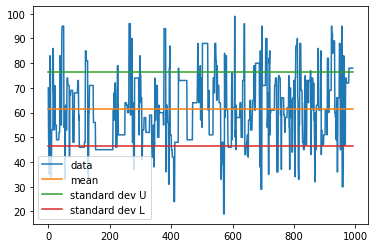

In [ ]:
df = pd.DataFrame({
    'data': disney['metascore'],
    'mean': disney['metascore'].mean(),
    'standard dev U': disney['metascore'].mean() + np.std(disney['metascore']),
    'standard dev L': disney['metascore'].mean() - np.std(disney['metascore'])
})
df.plot()
plt.show()

# **Netflix Data**

In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Julien Leclercq,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",India,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
netflix.info()#displays the non-null values count and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<function matplotlib.pyplot.show>

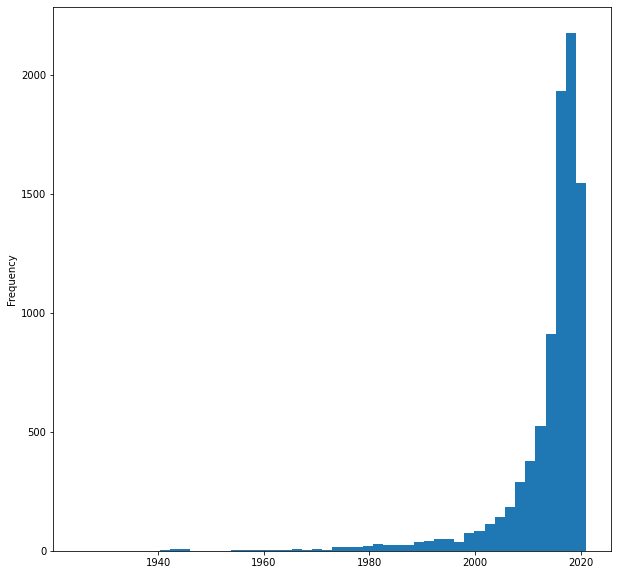

In [ ]:
netflix.release_year.plot(kind="hist",bins=50,figsize=(10,10))
plt.show

In [ ]:
netflix_m = netflix[netflix['type'] == "Movie"]

In [ ]:
netflix_m.shape

(6131, 12)

In [ ]:
netflix_t = netflix[netflix['type'] == "TV Show"]

In [ ]:
netflix_t.shape

(2676, 12)

In [ ]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 565 kB 4.4 MB/s 


In [ ]:
tot_df = 8807
num_m = 6131
num_t = 2676

In [ ]:
perc_films = num_m / tot_df * 100
print(perc_films)

69.61507891449983


In [ ]:
perc_tvs = num_t / tot_df * 100
print(perc_tvs)

30.38492108550017


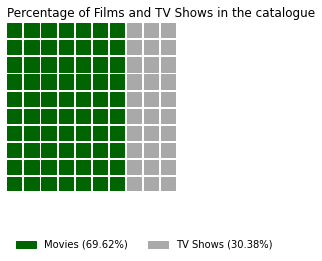

In [ ]:
data = {'Movies': 69.62, 'TV Shows': 30.38}
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    colors=("#006400", "#A9A9A9"),
    title={'label': 'Percentage of Films and TV Shows in the catalogue', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
)
fig.gca().set_facecolor("#ffffff")
fig.set_facecolor("#ffffff")
plt.show()

# **Amazon Prime Dataset**

### **Columns: finding isnull(), notnull(), nunique() values of the columns and ploting them using stacked bar graph**

In [ ]:
#Type
type_nonmissing= amazon['type'].notnull().sum()
type_missing =amazon['type'].isnull().sum()
t_unique = amazon['type'].nunique()

print(type_nonmissing)
print(type_missing)
print(t_unique)

9668
0
2


In [ ]:
#title 
title_nonmissing = amazon['title'].notnull().sum()
title_missing = amazon['title'].isnull().sum()
title_unique = amazon['title'].nunique()


print(title_nonmissing)
print(title_missing)
print(title_unique)

9668
0
9668


In [ ]:
#director
director_nm=amazon['director'].notnull().sum()
director_m = amazon['director'].isnull().sum()
d_unique = amazon['director'].nunique()

print(director_nm)
print(director_m)
print(d_unique)

9668
0
5774


In [ ]:
#country
country_nm =amazon['country'].notnull().sum()
counrty_m = amazon['country'].isnull().sum()
c_unique = amazon['country'].nunique()

print(country_nm)
print(counrty_m)
print(c_unique)

9645
23
86


In [ ]:
#rating
rating_nm = amazon['rating'].notnull().sum()
rating_m = amazon['rating'].isnull().sum()
r_unique = amazon['rating'].nunique()

print(rating_nm)
print(rating_m)
print(r_unique)

9668
0
24


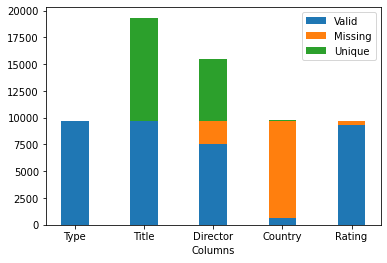

In [ ]:
x = ["Type","Title","Director","Country","Rating"]

non_missing = [9668,9668,7586,672,9331]
missing = [0,0,2082,8996,337]
unique = [2,9668,5774,86,24]

b_unique = list(np.add(non_missing,missing))

plt.bar(x,non_missing,0.4,label='Valid')
plt.bar(x,missing,0.4,bottom = non_missing,label='Missing')
plt.bar(x,unique,0.4,bottom =b_unique ,label='Unique')

plt.xlabel("Columns")
plt.legend()
plt.show()

### **Distribution of Content**

In [ ]:
z = amazon.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', 
                  title='Distribution of Content Ratings on Amazon Prime',
                  color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

### **Analysing Content**

In [ ]:
df1=amazon[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Amazon')
fig3.show()

# **Recommending to user**


In [ ]:
movie = input("Search:")
m=amazon.loc[amazon['title']==(movie)]
n=netflix.loc[netflix['title']==(movie)]
o=disney.loc[disney['title']==(movie)]
if(len(m) != 0):
  print(m)
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")

  # to search
  query = movie + " amazonprime online "

  for j in search(query, tld="co.in", num=1, stop=1, pause=2):
       print(j)
elif(len(n) != 0):
  print(n)
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")

  # to search
  query = movie + " netflix online "

  for j in search(query, tld="co.in", num=1, stop=1, pause=2):
       print(j)
elif(len(o) != 0):
  print(o)
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")

  # to search
  query = movie + " disney online "

  for j in search(query, tld="co.in", num=1, stop=1, pause=2):
       print(j)
else:
  try:
      from googlesearch import search
  except ImportError:
      print("No module named 'google' found")

  # to search
  query = movie + " watch online "
  for j in search(query, tld="co.in", num=1, stop=1, pause=2):
       print(j)
  


Search:Vampire Diaries
https://www.netflix.com/title/70143860


In [ ]:

user = input("select the option\n 1.amazon  2.netflix  3.disney \n")
if(user=='1'):
 print(amazon['title'].loc[amazon['release_year'] == 1990].head(10))
elif(user=='2'):
  print(netflix['title'].loc[netflix['release_year'] == 1990].head(10))
elif(user=='3'):
  print(disney['title'].loc[disney['released_at']==1990].head(10))


select the option
 1.amazon  2.netflix  3.disney 
1
478                           The Prisoner
555                     The Long Walk Home
654                    The Forbidden Dance
2176                                 How 2
2385                     Garfield Specials
2494            FBI's War on Black America
2989                 Boyfriend School, The
3009    Bobby's World: The Complete Series
3040                            Blind Fury
3161                              Bail Out
Name: title, dtype: object


In [ ]:
year = int(input("Enter the year:"))
a=netflix['title'].loc[netflix['release_year']==year].head(10)
b=amazon['title'].loc[amazon['release_year']==year].head(10)
c=disney['title'].loc[disney['released_at']==year].head(10)
pd.concat([a,b,c])

Enter the year:2016


104                    Tayo the Little Bus
152          Janoskians: Untold and Untrue
153                             Kid-E-Cats
203                   Kyaa Kool Hain Hum 3
212                              Rebellion
263                      Mother Goose Club
281                          Brother Jekwu
306                                    '76
328                      Boyka: Undisputed
352                  The Edge of Seventeen
7                             Grease Live!
10                          Forest Fairies
16                                Zoombies
38             Yoga with Sound Meditations
40             Yoga to Ease Flight Anxiety
47     Yoga for Mindfulness and Meditation
48                   Yoga for Men's Health
49               Yoga for Breath Awareness
50                      Yoga For Beginners
103                 Wild Colombia Revealed
Name: title, dtype: object

In [ ]:
num1= input("Was the recommendation favourable to you? ")
num2=input("Which ott platform did u like ")
num3=input("Rate our app ")
import sqlite3
connect =sqlite3.connect('/content/drive/MyDrive/OTT PROJECT/OTT.db')
c=connect.cursor()
c.execute("Create table Feedback (mailid text,feedback1 text,feedback2 text,feedback3 text)")
c.execute("Insert into Feedback values(?,?,?,?)",(email,num1 , num2, num3))
print("Thankyou for giving feedback")
connect.commit()
connect.close()

Was the recommendation favourable to you? yes
Which ott platform did u like amazon
Rate our app 10
Thankyou for giving feedback
